# Lab 6: Supervised Learning  

In this lab, we will keep working on supervised learning. We will first learn how to train decision trees and we will see that doing this using `sklearn` is not much different from running kNN algorithm.

## Lab 6.A: Decision Trees (50% of grade)

The following code is copied from https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html. You should be able to run the code without error messages.

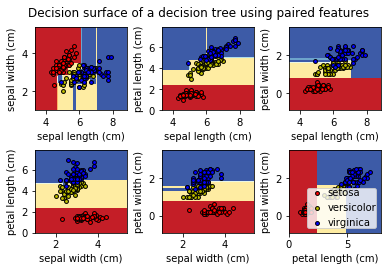

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

# Visualizing Decision Tree
# First you have to install two libraries: 'graphviz' and 'pydotplus'

### If you are using "pip" then install with:
pip install graphviz <br>
pip install pydotplus

### If you are using "anaconda" then install with:
conda install python-graphviz <br>
conda install -c conda-forge pydotplus

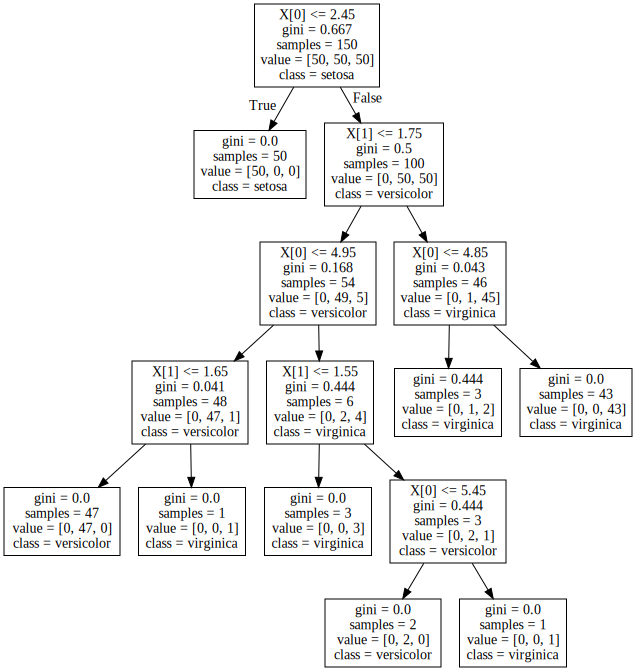

In [3]:
import graphviz
import pydotplus
from sklearn import tree

dot_data = tree.export_graphviz(clf, class_names=iris.target_names)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
graph = graphviz.Source(pydot_graph.to_string())
graph


**Question 1**. Study the code and try to understand what is happening in each line. Explain what the images plotted by the code show.

The decision surface graphs show how a decision tree trained with just two of the features of the iris dataset distinguishes between the classes. The section of a graph which is filled in with some color is the set of values of those features for which the decision tree predicts a certain class. <br>
The Graphviz decision-tree-rules visualization lays out the exact algorithm which the trained decision tree follows to make a prediction. It shows how the application of different rules splits up the training examples more and more effectively by class (as shown in the diminishing gini values).

**Question 2**. Train a decision tree on Iris data set using all 4 attributes. Before training, remember to reserve 50 randomly selected examples for test set and train on the remaining 100 examples. Use the default parameter values (no need to put anything in parenthesis in `DecisionTreeClassifier`). How long did it take to train the decision tree? Report the accuracy on the test set. Print the confusion matrix. Report the accuracy on the training set. Discuss if you are seeing any difference and why. Compare the accurracy with the accuracy you got with kNN. Report on the size of the resulting tree (how many nodes are there and what is the depth of the tree). Visualize the tree (consider using `sklearn.tree.export_graphviz`).

test accuracy-  0.98
confusion matrix:
 [[17  0  0]
 [ 0 18  1]
 [ 0  0 14]]
training set accuracy-  1.0


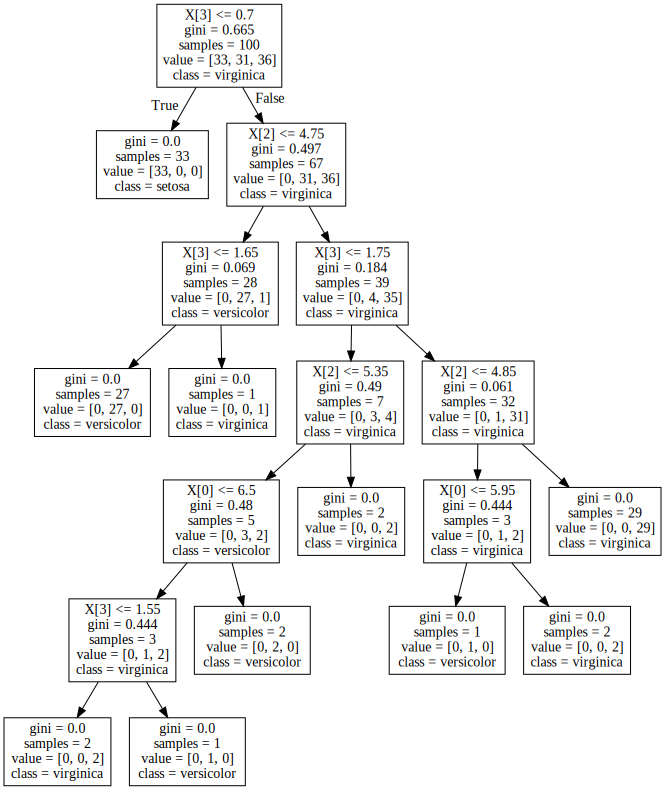

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

dec_tree_clf = DecisionTreeClassifier().fit(X_train, y_train)
print("test accuracy- ", dec_tree_clf.score(X_test, y_test))

test_preds = dec_tree_clf.predict(X_test)
tree_conf_matr = confusion_matrix(y_test, test_preds)
print("confusion matrix:\n", tree_conf_matr)

print("training set accuracy- ", dec_tree_clf.score(X_train, y_train))

dot_data2 = tree.export_graphviz(dec_tree_clf, class_names=iris.target_names)
pydot_graph2 = pydotplus.graph_from_dot_data(dot_data2)
graph2 = graphviz.Source(pydot_graph2.to_string())
graph2


It took almost no time at all to train the decision tree with all 4 attributes. <br>
The training set accuracy is a little higher than the test set accuracy (all the way up to 100%, no mistakes) because this decision tree was trained to add as many rules as necessary to achieve the best possible performance on the training set. <br>
The default-configuration decision tree significantly outperformed the best-configuration kNN algorithm, achieving test set accuracy in the high 90%'s while the kNN algorithms only got around 80% accuracy on the test set.   <br>
This (overfitted) tree is quite large, at 19 nodes, and quite deep, with as many as 6 rules being applied in sequence to make a decision.

**Question 3**. Train a decision tree on Iris data, but this time play with the parameters. You can se the detailed list of different choices at http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier. Experiment with `criterion` (default is `gini`, try to train using `entropy`), `max_depth` (try to set it to 2, 3, 4), `min_samples_leaf` (default is 1, try with 5, 15). See if you can find a combination of parameters that improves accuracy on the test set. Report what you found.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)

for dec_tree_tuning in [ {},
                            {"criterion":"entropy"},
                            {"max_depth":2},
                            {"max_depth":3},
                            { "max_depth":4},
                            {"min_samples_leaf":5},
                            {"min_samples_leaf":15},
                            {"criterion":"entropy", "max_depth":2},
                            {"criterion":"entropy", "max_depth":3},
                            {"criterion":"entropy", "max_depth":4},
                            {"criterion":"entropy", "min_samples_leaf":5},
                            {"criterion":"entropy", "min_samples_leaf":15},
                            {"min_samples_leaf":5, "max_depth":2},
                            {"min_samples_leaf":15, "max_depth":2},
                            {"criterion":"entropy", "min_samples_leaf":5, "max_depth":2},
                            {"criterion":"entropy", "min_samples_leaf":15, "max_depth":2},
                            {"min_samples_leaf":5, "max_depth":3},
                            {"min_samples_leaf":15, "max_depth":3},
                            {"criterion":"entropy", "min_samples_leaf":5, "max_depth":3},
                            {"criterion":"entropy", "min_samples_leaf":15, "max_depth":3},
                            {"min_samples_leaf":5, "max_depth":4},
                            {"min_samples_leaf":15, "max_depth":4},
                            {"criterion":"entropy", "min_samples_leaf":5, "max_depth":4},
                            {"criterion":"entropy", "min_samples_leaf":15, "max_depth":4}
                            ]:
    tuned_dec_tree_clf = DecisionTreeClassifier(**dec_tree_tuning)
    tuned_dec_tree_clf.fit(X_train, y_train)
    tuned_dec_tree_acc = tuned_dec_tree_clf.score(X_test, y_test)
    print("for configuration ", dec_tree_tuning, ", \n\ttest accuracy = ", tuned_dec_tree_acc)


for configuration  {} , 
	test accuracy =  0.9222222222222223
for configuration  {'criterion': 'entropy'} , 
	test accuracy =  0.9222222222222223
for configuration  {'max_depth': 2} , 
	test accuracy =  0.9222222222222223
for configuration  {'max_depth': 3} , 
	test accuracy =  0.9222222222222223
for configuration  {'max_depth': 4} , 
	test accuracy =  0.9222222222222223
for configuration  {'min_samples_leaf': 5} , 
	test accuracy =  0.9222222222222223
for configuration  {'min_samples_leaf': 15} , 
	test accuracy =  0.9222222222222223
for configuration  {'criterion': 'entropy', 'max_depth': 2} , 
	test accuracy =  0.9222222222222223
for configuration  {'criterion': 'entropy', 'max_depth': 3} , 
	test accuracy =  0.9222222222222223
for configuration  {'criterion': 'entropy', 'max_depth': 4} , 
	test accuracy =  0.9222222222222223
for configuration  {'criterion': 'entropy', 'min_samples_leaf': 5} , 
	test accuracy =  0.9222222222222223
for configuration  {'criterion': 'entropy', 'min_sam

I found that no suggested configuration change consistently produced a more accurate decision tree than the default configuration regardless of the random train-test data split. <br>
Even when I increased the size of the test set to reduce how much the random selection of the test set affected individual algorithms, no decision tree configuration emerged as clearly superior to another.

## Lab 6.B. Doing supervised learning on churn data set (50 points)

In this part of the lab, you will be using kNN and decision trees on the problem of churn prediction. 

In [2]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# data set is from The Yhat Blog: http://blog.yhat.com/posts/predicting-customer-churn-with-sklearn.html 
churn_df=pd.read_csv("https://raw.githubusercontent.com/CIS3715-temple-2018/CIS3715-temple-2018.github.io/master/churn.csv")
churn_df.head()

<ipython-input-2-744561b29a33>:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [2]:
print("Column names: {}".format(churn_df.columns.tolist()))

Column names: ['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?']


This is a dataset from a telecom company, of their customers. Based on the recorded attributes of these customers and their calling plans, we want to predict if a customer is likely to leave the company (the last column in the table). This is expensive for the company, as a lost customer means lost monthly revenue.

**Question 4**. Perform EDA on the data set to get an insight into the data,
including answering what fraction of customers left the company,
what are attributes about, what are their properties,
how are attributes and the churn related.
Prepare 1-2 page document summarizing the interesting aspects of the data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021953BE7B80>,
      dtype=object)

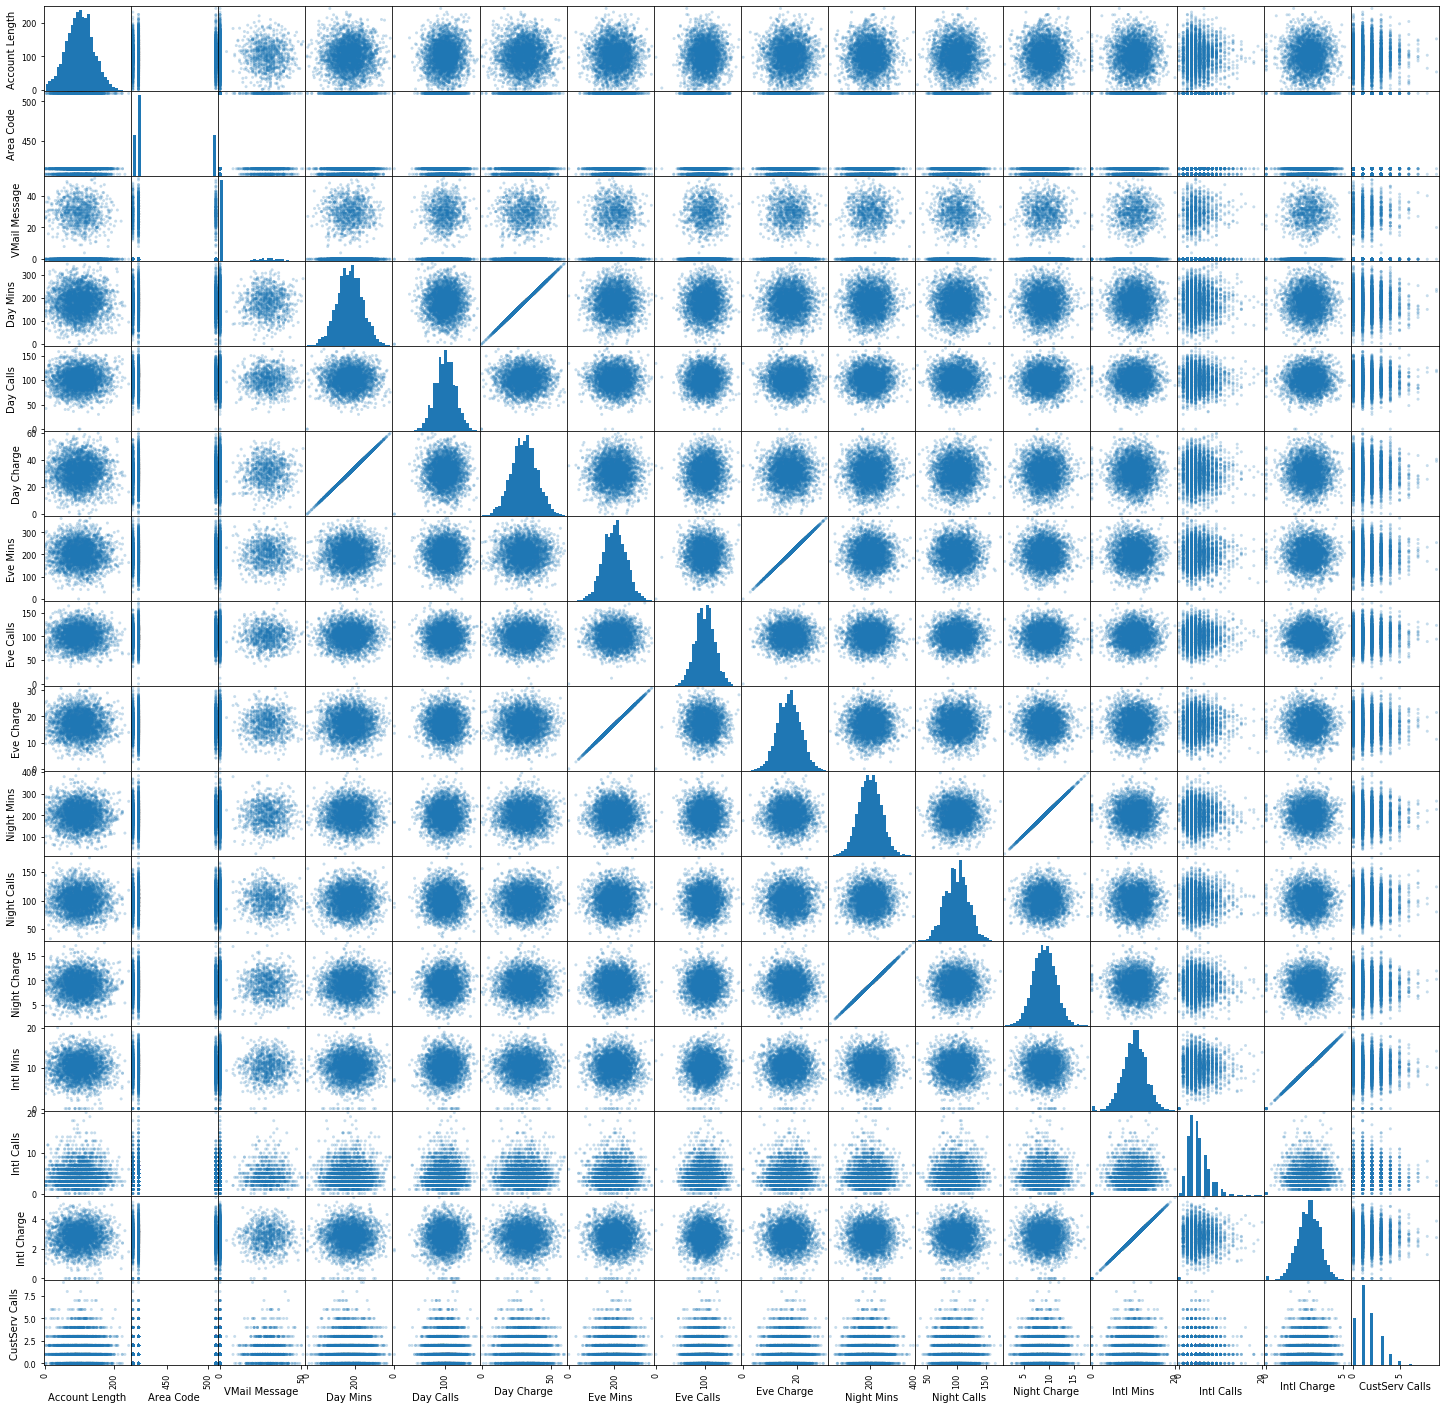

In [3]:
pd.plotting.scatter_matrix(churn_df, alpha=0.25, figsize=(25, 25), hist_kwds={"bins":30})

In [3]:
initCustomerCount = churn_df.shape[0]
churnOutcomes = churn_df['Churn?']
departedIndices = churnOutcomes.index[churnOutcomes == "True."]
loyalIndices = (churn_df.index.copy()).difference(departedIndices)


numDeparted = len(departedIndices)
print("number of customers lost: ", numDeparted, " out of ", initCustomerCount, " people who were initially customers")
print("customer loss rate: ", numDeparted / initCustomerCount)

number of customers lost:  483  out of  3333  people who were initially customers
customer loss rate:  0.14491449144914492


In [4]:
departedCustomers = churn_df.iloc[departedIndices]
departedCustomers.head(15)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
10,IN,65,415,329-6603,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True.
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
21,CO,77,408,393-7984,no,no,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True.
33,AZ,12,408,360-1596,no,no,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True.
41,MD,135,408,383-6029,yes,yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True.
48,ID,119,415,398-1294,no,no,0,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,5,True.
54,WY,87,415,353-3759,no,no,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,True.
57,CO,121,408,370-7574,no,yes,30,198.4,129,33.73,75.3,77,6.40,181.2,77,8.15,5.8,3,1.57,3,True.
69,TX,150,510,374-8042,no,no,0,178.9,101,30.41,169.1,110,14.37,148.6,100,6.69,13.8,3,3.73,4,True.
76,DC,82,415,374-5353,no,no,0,300.3,109,51.05,181.0,100,15.39,270.1,73,12.15,11.7,4,3.16,0,True.


In [5]:
loyalCustomers = churn_df.iloc[loyalIndices, :]
loyalCustomers.head(15)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [18]:
print("aggregated overall customer characteristics")
overallCustomersAggregate = churn_df.describe()
overallCustomersAggregate = overallCustomersAggregate.drop(index="count")
overallCustomersAggregate = overallCustomersAggregate.drop(columns=["Area Code", "VMail Message"])
overallCustomersAggregate

aggregated overall customer characteristics


,Account Length,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
mean,101.064806,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [19]:
print("aggregated departed customer characteristics:")
departedCustomersAggregate = departedCustomers.describe()
departedCustomersAggregate = departedCustomersAggregate.drop(index="count")
departedCustomersAggregate = departedCustomersAggregate.drop(columns=["Area Code", "VMail Message"])
departedCustomersAggregate

aggregated departed customer characteristics:


,Account Length,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
mean,102.664596,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.70000,4.163561,2.889545,2.229814
std,39.467820,68.997792,21.582307,11.729710,51.728910,19.724711,4.396762,47.132825,19.950659,2.121081,2.79319,2.551575,0.754152,1.853275
min,1.000000,0.000000,0.000000,0.000000,70.900000,48.000000,6.030000,47.400000,49.000000,2.130000,2.00000,1.000000,0.540000,0.000000
25%,76.000000,153.250000,87.500000,26.055000,177.100000,87.000000,15.055000,171.250000,85.000000,7.705000,8.80000,2.000000,2.380000,1.000000
50%,103.000000,217.600000,103.000000,36.990000,211.300000,101.000000,17.960000,204.800000,100.000000,9.220000,10.60000,4.000000,2.860000,2.000000
75%,127.000000,265.950000,116.500000,45.210000,249.450000,114.000000,21.205000,239.850000,115.000000,10.795000,12.80000,5.000000,3.460000,4.000000
max,225.000000,350.800000,165.000000,59.640000,363.700000,168.000000,30.910000,354.900000,158.000000,15.970000,20.00000,20.000000,5.400000,9.000000


In [16]:
print("aggregated loyal customer characteristics:")
loyalCustomersAggregate = loyalCustomers.describe()
loyalCustomersAggregate = loyalCustomersAggregate.drop(index="count")
loyalCustomersAggregate = loyalCustomersAggregate.drop(columns=["Area Code", "VMail Message"])
loyalCustomersAggregate

aggregated loyal customer characteristics:


,Account Length,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
mean,100.793684,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
std,39.882350,50.181655,19.801157,8.530835,50.292175,19.958414,4.274863,51.105032,19.506246,2.299768,2.784489,2.441984,0.751784,1.163883
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,142.825000,87.000000,24.282500,164.500000,87.000000,13.980000,165.900000,87.000000,7.470000,8.400000,3.000000,2.270000,1.000000
50%,100.000000,177.200000,100.000000,30.120000,199.600000,100.000000,16.970000,200.250000,100.000000,9.010000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,210.300000,114.000000,35.750000,233.200000,114.000000,19.820000,234.900000,113.000000,10.570000,12.000000,6.000000,3.240000,2.000000
max,243.000000,315.600000,163.000000,53.650000,361.800000,170.000000,30.750000,395.000000,175.000000,17.770000,18.900000,19.000000,5.100000,8.000000


In [20]:
print("differences between aggregated characteristics of departed and loyal customers:")
customerAggregateDiffs = departedCustomersAggregate.subtract(loyalCustomersAggregate)
#departed customer values and loyal customer values probably aren't independent random variables
customerAggregateDiffs = customerAggregateDiffs.drop(index="std")
customerAggregateDiffs

differences between aggregated characteristics of departed and loyal customers:


,Account Length,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
mean,1.870912,31.738324,1.052246,5.3955,13.366847,0.52248,1.13606,5.098484,0.34134,0.229454,0.541123,-0.369421,0.146141,0.779989
min,0.000000,0.000000,0.000000,0.0000,70.900000,48.00000,6.03000,24.200000,16.00000,1.090000,2.000000,1.000000,0.540000,0.000000
25%,3.000000,10.425000,0.500000,1.7725,12.600000,0.00000,1.07500,5.350000,-2.00000,0.235000,0.400000,-1.000000,0.110000,0.000000
50%,3.000000,40.400000,3.000000,6.8700,11.700000,1.00000,0.99000,4.550000,0.00000,0.210000,0.400000,0.000000,0.110000,1.000000
75%,0.000000,55.650000,2.500000,9.4600,16.250000,0.00000,1.38500,4.950000,2.00000,0.225000,0.800000,-1.000000,0.220000,2.000000
max,-18.000000,35.200000,2.000000,5.9900,1.900000,-2.00000,0.16000,-40.100000,-17.00000,-1.800000,1.100000,1.000000,0.300000,1.000000


Text(0.5, 1.0, 'Distribution of VMail message use among customers with a VMail Plan')

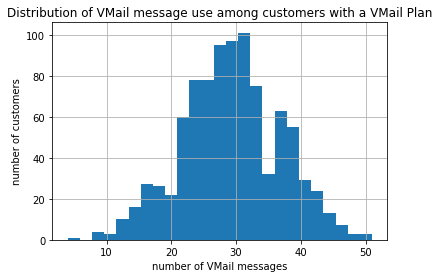

In [6]:
import matplotlib.pyplot as plt

hasVmailIndices = churn_df.index[churn_df["VMail Plan"] == "yes"]
vmailCustomers = churn_df.iloc[hasVmailIndices, :]
vmailMessageCounts = vmailCustomers["VMail Message"]
vmailMessageCounts.hist(bins=25)
plt.xlabel("number of VMail messages")
plt.ylabel("number of customers")
plt.title("Distribution of VMail message use among customers with a VMail Plan")

In [7]:
vmailMessageCounts.describe()

count    922.000000
mean     29.277657 
std      7.559027  
min      4.000000  
25%      24.000000 
50%      29.000000 
75%      34.000000 
max      51.000000 
Name: VMail Message, dtype: float64

Text(0.5, 1.0, 'Distribution of customer service calls across customer base')

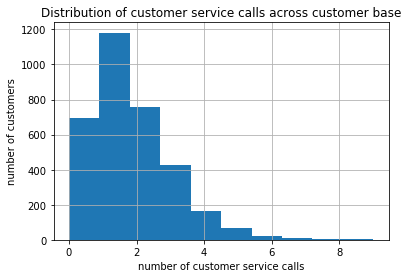

In [10]:
churn_df["CustServ Calls"].hist(bins=10)
plt.xlabel("number of customer service calls")
plt.ylabel("number of customers")
plt.title("Distribution of customer service calls across customer base")


**Question 5**. Train and test a kNN classifier. First, select 1,000 random customers and save them for testing. You can use the remaining ones for training. Then, you will need to decide what to do with the categorical attributes. The easiest is to simply ignore them, but it would reduce your accuracy. A better way (you have to try it) is to convert the categorical attributes to numbers. It is up to you to decide what distance measure to use, how to pick `k`, and make any other decision that will help you increase the accuracy. For example, it might help you to scale the attributes to the same range. Remember that any transformation you do on the training data needs to be repeated on the test data. Report on the best accuracy you are able to get (please do not forget to split the data into training and test before proceeding). Also report the confusion matrix. Provide a discussion of your choices.

**Question 6**. Train and test a decision tree. Do it on the same traing-test split you used in *Question 5*. Your goal is to try to figure out the best way to train an accurate decision tree. Report on your findings. Compare your results with the kNN results.

**Question 7**. Lets assume you have to use your churn classifier to contact your existing customers and try to prevent churn. The cost of each contact is \\$10. Let us assume each contacted customer will decide to stay. Your profit in keeping a customer is \\$30. Given your best decision tree and kNN classifiers, what is the expected profit on your test data? Can you try to train another classifier that would have even larger profit?